In [1]:
from fastai.vision.all import *
import fastai

# Train data

In [2]:
# Data path
path = Path('/kaggle/input/pnevmoniya/train')

# Data Block
pneumonia = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=18),
    get_y = parent_label,
    item_tfms = Resize(256)
)

# Data loaders
dls = pneumonia.dataloaders(path)

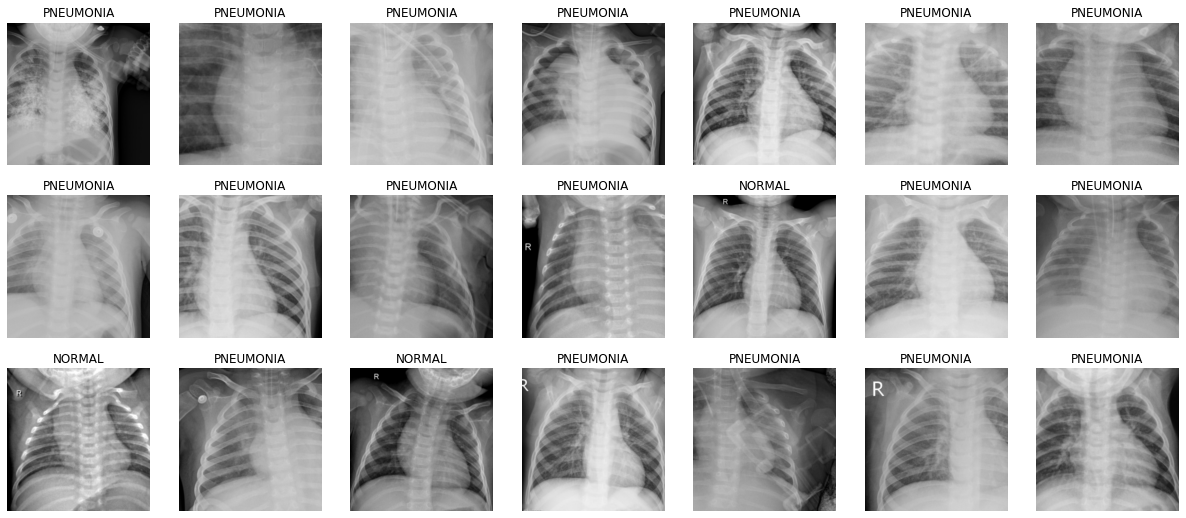

In [3]:
# check dataset

dls.train.show_batch(max_n=21, nrows=3)

# Model

In [4]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(5)   # train

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.411367,0.202739,0.944391,01:57


epoch,train_loss,valid_loss,accuracy,time
0,0.137375,0.114747,0.973154,01:45
1,0.096909,0.214908,0.949185,01:47
2,0.049359,0.066317,0.983701,01:45
3,0.028626,0.061432,0.992330,01:46
4,0.018164,0.055557,0.991371,01:47


# Evaluation

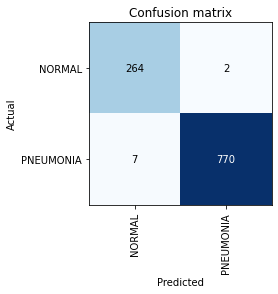

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()   # confusion matrix

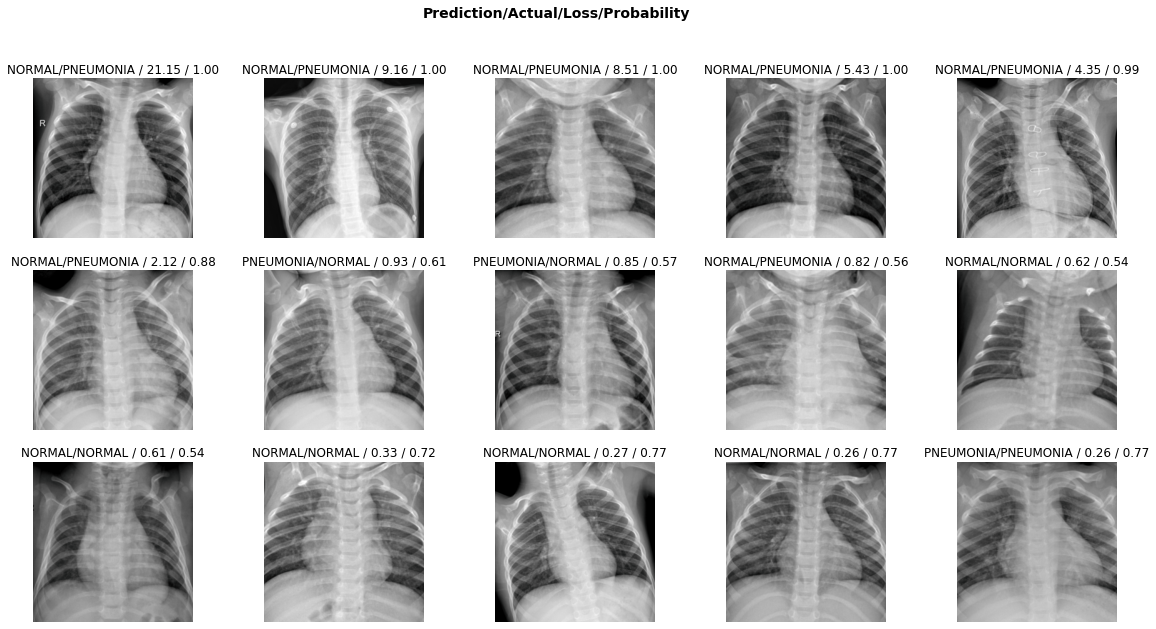

In [6]:
# the most lossed predicts

interp.plot_top_losses(15,figsize=(20,10))

# Test data

In [ ]:
solution = pd.read_csv('/kaggle/input/pnevmoniya/sample_solution.csv', index_col=0)

predict = []
for i in solution.index:
    num, n_th, probs = learn.predict('/kaggle/input/pnevmoniya/test/'+i)
    predict.append(0 if num == 'NORMAL' else 1)

In [8]:
# check predicton

len(predict), predict[:5]

(624, [1, 0, 1, 1, 0])

# Submission

In [9]:
solution.labels = predict
solution.to_csv("submission.csv")
pd.read_csv("./submission.csv")

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,1
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,1
622,test_img_10623.jpeg,1
